# Test MODELS

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torchvision.utils as vutils
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader
from skimage.metrics import structural_similarity as ssim

from PIL import Image
import pandas as pd
from icecream import ic
import cv2



e:\Programe\Anaconda\envs\Pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# CGAN 64x64
- 15 epoci
- 30 epoci

In [53]:
## MODELS ##
from Models.CGAN_64x64.dataset import DatasetCelebA
from Models.CGAN_64x64.discriminator_test import Discriminator
from Models.CGAN_64x64.generator_test import Generator

def generate_images64(base_path='E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\CGAN_64x64\\15epoci', attribut=0, img_size=64, display=0):
# Dimensiunea vectorului latent
    dim_zgomot = 100

    retea_G = Generator(dim_zgomot=dim_zgomot, img_size=img_size)
    retea_D = Discriminator(img_size=img_size)


    retea_G.load_state_dict(torch.load(base_path + '\\retea_Generator.pt'))
    retea_D.load_state_dict(torch.load(base_path + '\\retea_Discriminator.pt'))

    # retea_G.load_state_dict(torch.load('E:\Lucru\Dizertatie\Cod\ConditionalGAN_onlyGender\\10epoci\\retea_Generator.pt'))
    # retea_D.load_state_dict(torch.load('E:\Lucru\Dizertatie\Cod\ConditionalGAN_onlyGender\\10epoci\\retea_Discriminator.pt'))

    retea_G.cuda()
    retea_D.cuda()

    retea_G.eval()
    retea_D.eval()
    # esantioane_proba = torch.randn(1, dim_zgomot, 1, 1)
    # etichete_proba = torch.LongTensor([0])

    esantioane_proba = torch.randn(1, dim_zgomot, 1, 1)
    etichete_proba = torch.FloatTensor([[attribut]])

    etichete_proba = etichete_proba.to(torch.device('cuda'))
    esantioane_proba = esantioane_proba.to(torch.device('cuda'))


    imagini_generate = retea_G(esantioane_proba, etichete_proba).detach()
    imagini_generate = torch.squeeze(imagini_generate, 0)

    imagini_generate = imagini_generate.to(torch.device('cpu'))

    # plt.figure()
    # plt.title("Imagini generate")
    # plt.imshow(np.transpose(imagini_generate,(1,2,0)))
    # plt.show()
    if display == 1:
        plt.figure()
        plt.imshow(np.transpose(imagini_generate,(1,2,0)))
        plt.show()

    return np.transpose(imagini_generate,(1,2,0))




In [3]:
path1='E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\CGAN_64x64\\15epoci'
path2='E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\CGAN_64x64\\40epoci'

img_1 = generate_images64(base_path=path1, attribut=0)
# plt.figure(figsize=(5,5))
# plt.subplot(1,2,1)
# plt.imshow(img_1)
# img_2 = generate_images(base_path=path1, attribut=0)
# plt.subplot(1,2,2)
# plt.imshow(img_2)
# plt.show()

# img_1 = img_1.numpy()
# img_2 = img_2.numpy()
# # Convert the images to grayscale if necessary
# if img_1.ndim == 3:
#     img_1 = img_1.mean(axis=2)
# if img_2.ndim == 3:
#     img_2 = img_2.mean(axis=2)

# ssim_value = ssim(img_1, img_2, data_range=img_2.max() - img_2.min())
# ssim_value2 = ssim(img_1, img_2, data_range=1.0, gaussian_weights=True, sigma=1.5)


# print("SSIM:", ssim_value)
# print("SSIM:", ssim_value2)

# CGAN 128x128
- 7 epoci

In [48]:
## MODELS ##
from Models.CGAN_128x128.no_crop.generator import Generator as Generator128

def generate_images128(base_path = 'E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\CGAN_128x128\\no_crop',img_size=128,attribute=[0,1,0,0,0,0], display = 0):
# Dimensiunea vectorului latent
    dim_zgomot = 100

    retea_G = Generator128(dim_zgomot=dim_zgomot, img_size=img_size, attribute_number=6)

    retea_G.load_state_dict(torch.load(base_path + '\\retea_Generator.pt'))
    retea_G.cuda()
    retea_G.eval()
    esantioane_proba = torch.randn(1, dim_zgomot, 1, 1)
    etichete_proba = torch.LongTensor([0])

    esantioane_proba = torch.randn(1, dim_zgomot, 1, 1)
    etichete_proba = torch.FloatTensor([attribute])

    etichete_proba = etichete_proba.to(torch.device('cuda'))
    esantioane_proba = esantioane_proba.to(torch.device('cuda'))

    imagini_generate = retea_G(esantioane_proba, etichete_proba).detach()
    imagini_generate = torch.squeeze(imagini_generate, 0)

    imagini_generate = imagini_generate.to(torch.device('cpu'))


    if display == 1:
        plt.figure()
        plt.imshow(np.transpose(imagini_generate,(1,2,0)))
        plt.show()

    return np.transpose(imagini_generate,(1,2,0))

# imagini_generate = generate_images128(display=1)

# A2F
- 64x64

Using cache found in C:\Users\Teodora/.cache\torch\hub\pytorch_vision_v0.10.0


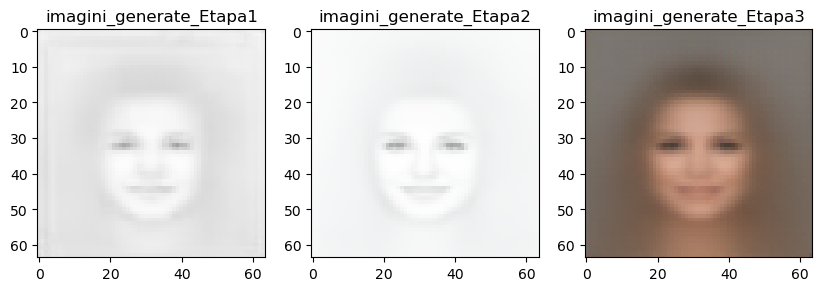

In [45]:
## MODELS ##
from Models.A2F_64x64.dataset import  DatasetCelebA_Sketch
from Models.A2F_64x64.Discriminator_Stage2 import Discriminator as Discriminator_S2
from Models.A2F_64x64.Generator_Stage2 import Generator as Generator_S2
from Models.A2F_64x64.Discriminator_Stage3 import Discriminator as Discriminator_S3
from Models.A2F_64x64.Generator_Stage3 import Generator as Generator_S3
from Models.A2F_64x64.CVAE_Encoder import Encoder
from Models.A2F_64x64.CVAE_Decoder import Decoder
DEVICE = 'cuda'

def init_models(base_path, attribute_dim=4, img_size=64):
    encoder = Encoder(attribute_number=attribute_dim)
    decoder = Decoder(attribute_number=attribute_dim)
    retea_G3 = Generator_S3(img_size=3, attribute_number=attribute_dim)
    retea_D3 = Discriminator_S3(img_size=img_size, attribute_number=attribute_dim)
    retea_G2 = Generator_S2(attribute_number=attribute_dim)
    retea_D2 = Discriminator_S2(img_size=img_size, attribute_number=attribute_dim)
    retea_G3.cuda()
    retea_D3.cuda()
    retea_G2.cuda()
    retea_D2.cuda()
    encoder.cuda()
    decoder.cuda()
    encoder.eval()
    decoder.eval()
    retea_G3.eval()
    retea_D3.eval()
    retea_G2.eval()
    retea_D2.eval()

    decoder.load_state_dict(torch.load(base_path + '\\retea_Decoder.pt'))
    encoder.load_state_dict(torch.load(base_path + '\\retea_Encoder.pt'))

    retea_D2.load_state_dict(torch.load(base_path + '\\retea_D_Stage2.pt'))
    retea_G2.load_state_dict(torch.load(base_path + '\\retea_G_Stage2.pt'))

    retea_D3.load_state_dict(torch.load(base_path + '\\A2F_retea_D_Stage3.pt'))
    retea_G3.load_state_dict(torch.load(base_path + '\\A2F_retea_G_Stage3.pt'))
    return encoder, decoder, retea_D2, retea_G2, retea_D3, retea_G3

base_path='E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\A2F_64x64'
def synth_images_noise(base_path='E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\A2F_64x64', attribut=[0,0,0,1], img_size=64, display=0, stage=3):
    encoder, decoder, retea_D2, retea_G2, retea_D3, retea_G3 = init_models(base_path=base_path)

    sketch_img = torch.randn(3, img_size, img_size)
    esantioane_proba = torch.stack([sketch_img], dim=0)
    attributes = torch.FloatTensor([attribut])

    esantioane_proba = esantioane_proba.to(torch.device(DEVICE))
    attributes = attributes.to(torch.device(DEVICE))
    zgomot_proba = torch.FloatTensor(esantioane_proba.shape[0], 256).normal_(0, 1)
    zgomot_proba  = zgomot_proba.to(torch.device(DEVICE))

    zgomot_embedded, schita_embedded, encode_text = encoder(noise=zgomot_proba, attr_text=attributes, sketch=esantioane_proba, detach_flag=True)
    reconstructed_sketch_images, reconstructed_fake_images = decoder(zgomot_embedded[0], schita_embedded[0], detach_flag=True)

    imagini_generate_Stage2 = retea_G2(reconstructed_fake_images, encode_text).detach()
    imagini_generate_Stage3 = retea_G3(imagini_generate_Stage2, attributes).detach()


    reconstructed_sketch_images = torch.squeeze(reconstructed_fake_images, 0)
    reconstructed_sketch_images = reconstructed_sketch_images.to(torch.device('cpu'))

    reconstructed_fake_images = torch.squeeze(reconstructed_fake_images, 0)
    reconstructed_fake_images = reconstructed_fake_images.to(torch.device('cpu'))

    imagini_generate_Stage2 = torch.squeeze(imagini_generate_Stage2, 0)
    imagini_generate_Stage2 = imagini_generate_Stage2.to(torch.device('cpu'))

    imagini_generate_Stage3 = torch.squeeze(imagini_generate_Stage3, 0)
    imagini_generate_Stage3 = imagini_generate_Stage3.to(torch.device('cpu'))


    if display == 1 :
        plt.figure(figsize=(10,15))
        plt.subplot(1, 3, 1)
        plt.imshow(np.transpose(reconstructed_fake_images,(1,2,0)), cmap='gray')
        plt.title("imagini_generate_Etapa1")
        plt.subplot(1, 3, 2)
        plt.imshow(np.transpose(imagini_generate_Stage2,(1,2,0)), cmap='gray')
        plt.title("imagini_generate_Etapa2")
        plt.subplot(1, 3, 3)
        plt.imshow(np.transpose(imagini_generate_Stage3,(1,2,0)), cmap='gray')
        plt.title("imagini_generate_Etapa3")
        plt.show()
    
    if stage==3:
        return np.transpose(imagini_generate_Stage3,(1,2,0))
    
    if stage==2:
        return np.transpose(imagini_generate_Stage2,(1,2,0))
    
    if stage==1:
        return np.transpose(reconstructed_fake_images,(1,2,0))

a = synth_images_noise(attribut=[0,0,0,1] ,display=1)

# A2F sketch


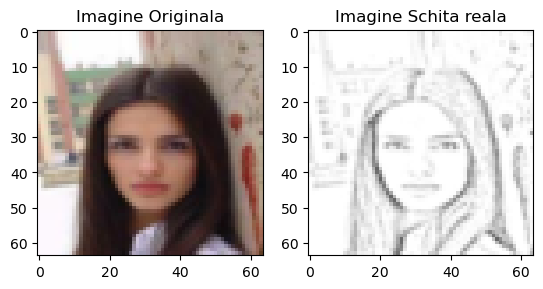

In [6]:
ATTR_DIM = 4
resize =  transforms.Compose([
                                transforms.ToPILImage(),
                                transforms.Resize([64,64])])

def read_images(index, display=1):
    EXCEL_PATH = "E:\Lucru\Dizertatie\Cod\Face_Synthesis\Database\celebA_medium.xlsx"
    DATASET_PATH = "E:\Lucru\Dizertatie\Cod\Face_Synthesis\Database\medium_dataset\\"
    SKETCH_DATASET_PATH = "E:\Lucru\Dizertatie\Cod\Face_Synthesis\Database\medium_dataset_sketch\\"

    resize =  transforms.Compose([
                                transforms.ToPILImage(),
                                transforms.Resize([64,64])])

    transf = transforms.Compose([
                                transforms.ToPILImage(),
                                transforms.Resize([64,64]),
                                transforms.ToTensor()])

    transf_sketch = transforms.Compose([
                                transforms.ToPILImage(),
                                transforms.Resize([64,64]),
                                transforms.ToTensor()])

    df = pd.read_excel(EXCEL_PATH)
    data = df["image_id"]
    labels = df.iloc[:, 1:(ATTR_DIM + 1)]
    # labels = df["Male"]

    # index = 17

    # 25 - nice female
    # 31 - male

    img = cv2.imread(DATASET_PATH + data[index])
    # img = cv2.imread('E:\Lucru\Dizertatie\Cod\Image-to-Sketch\source\\Vaman_Teodora.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    sketch_img = cv2.imread(SKETCH_DATASET_PATH + data[index])
    # sketch_img = cv2.imread('E:\Lucru\Dizertatie\Cod\Image-to-Sketch\destination\\Vaman_Teodora.jpg')
    sketch_img = cv2.cvtColor(sketch_img, cv2.COLOR_BGR2RGB)

    batch_data = img
    batch_data = transf(batch_data)

    batch_sketch_data = sketch_img
    batch_sketch_data = transf_sketch(batch_sketch_data)

    batch_labels = labels.iloc[index].values
    pil_img = resize(img)
    pil_img_sketch = resize(sketch_img)
    if display == 1 :
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.title("Imagine Originala")
        plt.imshow(np.asarray(pil_img))
        plt.subplot(1, 2, 2)
        plt.imshow(np.asarray(pil_img_sketch))
        plt.title("Imagine Schita reala")

    # print(f"Attributes [Gender Smiling Eyeglasses No_Beard] = {labels.iloc[index].values}")
    # Gender Smiling Eyeglasses No_Beard
    return batch_sketch_data, batch_data, batch_labels, np.asarray(pil_img)

sketch_img, img, labels, show_img = read_images(25)

In [46]:
## MODELS ##
from Models.A2F_64x64.Discriminator_Stage2 import Discriminator as Discriminator_S2
from Models.A2F_64x64.Generator_Stage2 import Generator as Generator_S2
from Models.A2F_64x64.Discriminator_Stage3 import Discriminator as Discriminator_S3
from Models.A2F_64x64.Generator_Stage3 import Generator as Generator_S3
from Models.A2F_64x64.CVAE_Encoder import Encoder
from Models.A2F_64x64.CVAE_Decoder import Decoder
DEVICE = 'cuda'
from GenderRecognNetwork.network import CNN

image_shape = [3,128,128]

def init_models_sketch(base_path, attribute_dim=4, img_size=64):
    encoder = Encoder(attribute_number=attribute_dim)
    decoder = Decoder(attribute_number=attribute_dim)
    retea_G3 = Generator_S3(img_size=3, attribute_number=attribute_dim)
    retea_D3 = Discriminator_S3(img_size=img_size, attribute_number=attribute_dim)
    retea_G2 = Generator_S2(attribute_number=attribute_dim)
    retea_D2 = Discriminator_S2(img_size=img_size, attribute_number=attribute_dim)
    retea_G3.cuda()
    retea_D3.cuda()
    retea_G2.cuda()
    retea_D2.cuda()
    encoder.cuda()
    decoder.cuda()
    encoder.eval()
    decoder.eval()
    retea_G3.eval()
    retea_D3.eval()
    retea_G2.eval()
    retea_D2.eval()

    decoder.load_state_dict(torch.load(base_path + '\\retea_Decoder.pt'))
    encoder.load_state_dict(torch.load(base_path + '\\retea_Encoder.pt'))

    retea_D2.load_state_dict(torch.load(base_path + '\\retea_D_Stage2.pt'))
    retea_G2.load_state_dict(torch.load(base_path + '\\retea_G_Stage2.pt'))

    retea_D3.load_state_dict(torch.load('E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\A2F_sketch\A2F_retea_D_stage3.pt'))
    retea_G3.load_state_dict(torch.load('E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\A2F_sketch\A2F_retea_G_stage3.pt'))
    return encoder, decoder, retea_D2, retea_G2, retea_D3, retea_G3


base_path='E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\A2F_64x64'
# encoder, decoder, retea_D2, retea_G2, retea_D3, retea_G3 = init_models(base_path=base_path)

def synth_images_sketch(base_path='E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\A2F_64x64', attribute=[0,0,0,1], img_size=64, display=0, stage=3):
    encoder, decoder, retea_D2, retea_G2, retea_D3, retea_G3 = init_models_sketch(base_path=base_path)

    transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize([128,128]),
            transforms.ToTensor()])
    

    # random_index = random.randint(0, 80000)
    random_index = 170
    sketch_img, img, labels, show_img = read_images(index=random_index, display=0)

#     sketch_img = torch.randn(3, img_size, img_size)
    esantioane_proba = torch.stack([sketch_img], dim=0)
    attributes = torch.FloatTensor([attribute])

    esantioane_proba = esantioane_proba.to(torch.device(DEVICE))
    attributes = attributes.to(torch.device(DEVICE))
    zgomot_proba = torch.FloatTensor(esantioane_proba.shape[0], 256).normal_(0, 1)
    zgomot_proba  = zgomot_proba.to(torch.device(DEVICE))

    zgomot_embedded, schita_embedded, encode_text = encoder(noise=zgomot_proba, attr_text=attributes, sketch=esantioane_proba, detach_flag=True)
    reconstructed_sketch_images, reconstructed_fake_images = decoder(zgomot_embedded[0], schita_embedded[0], detach_flag=True)

    imagini_generate_Stage2 = retea_G2(reconstructed_sketch_images, encode_text).detach()
    imagini_generate_Stage3 = retea_G3(imagini_generate_Stage2, attributes).detach()

    reconstructed_sketch_images = torch.squeeze(reconstructed_sketch_images, 0)
    reconstructed_sketch_images = reconstructed_sketch_images.to(torch.device('cpu'))

    imagini_generate_Stage2 = torch.squeeze(imagini_generate_Stage2, 0)
    imagini_generate_Stage2 = imagini_generate_Stage2.to(torch.device('cpu'))

    imagini_generate_Stage3 = torch.squeeze(imagini_generate_Stage3, 0)
    imagini_generate_Stage3 = imagini_generate_Stage3.to(torch.device('cpu'))
    


    img_generata = np.transpose(imagini_generate_Stage3,(1,2,0))
    input_image = transform(imagini_generate_Stage3)

    input_image = input_image.view(1,input_image.size(0),input_image.size(1),input_image.size(2))

    # predicted_label = output.detach().numpy()

    if display == 1 :
            plt.figure(figsize=(10,15))
            plt.subplot(1, 3, 1)
            plt.imshow(np.transpose(reconstructed_sketch_images,(1,2,0)), cmap='gray')
            plt.title("imagini_generate_Etapa1")
            plt.subplot(1, 3, 2)
            plt.imshow(np.transpose(imagini_generate_Stage2,(1,2,0)), cmap='gray')
            plt.title("imagini_generate_Etapa2")
            plt.subplot(1, 3, 3)
            plt.imshow(np.transpose(imagini_generate_Stage3,(1,2,0)), cmap='gray')
            plt.title("imagini_generate_Etapa3")
            plt.show()
    
    if stage==3:
        return np.transpose(imagini_generate_Stage3,(1,2,0))
    
    
    return imagini_generate_Stage3
        

    


# GENERATING IMAGES

## -----  CGAN 64 ----- ##


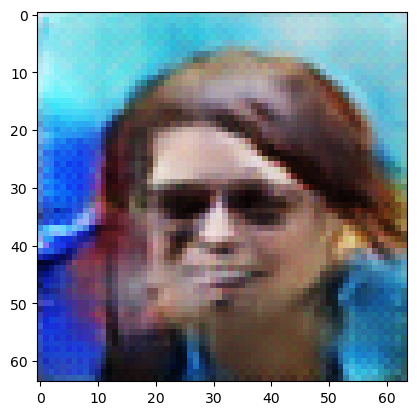

## -----  CGAN 128 ----- ##


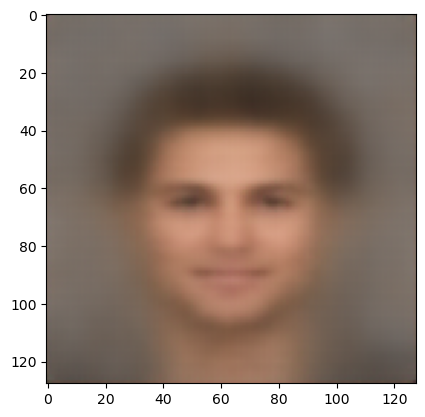

## -----  A2F noise ----- ##


Using cache found in C:\Users\Teodora/.cache\torch\hub\pytorch_vision_v0.10.0


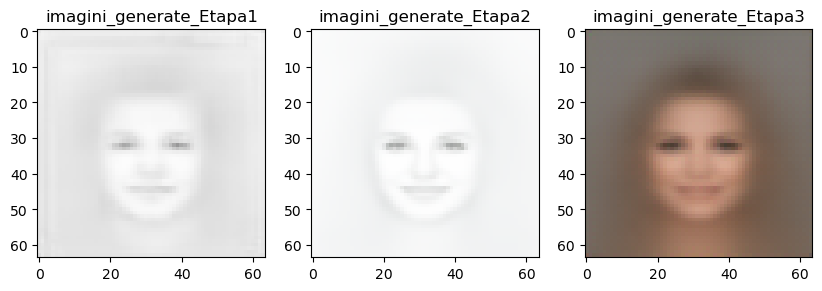

## -----  A2F sketch ----- ##


Using cache found in C:\Users\Teodora/.cache\torch\hub\pytorch_vision_v0.10.0
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


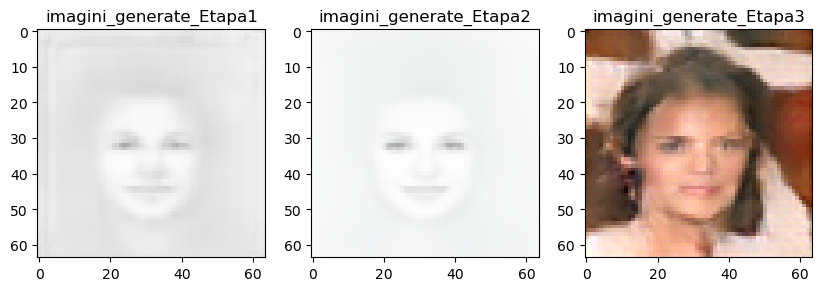

In [56]:
print("## -----  CGAN 64 ----- ##")
imagini_generate = generate_images64(attribut=0, display=1)
print("## -----  CGAN 128 ----- ##")
imagini_generate = generate_images128(attribute=[1,1,0,0,0,0], display=1)
print("## -----  A2F noise ----- ##")
imagini_generate = synth_images_noise(attribut=[0,0,0,1], display=1)
print("## -----  A2F sketch ----- ##")
imagini_generate = synth_images_sketch(attribute=[0,0,0,1], display=1)